### 2. Aplicar los algoritmos necesarios para el mejoramiento del contraste en las siguientes imágenes médicas.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib. pyplot as plt

def desplazarHist1(img,des):
    img = img + des
    return(img)

def desplazarHist2(img,des):
    img2 = np.copy(img)
    f,c = img.shape
    i=0
    k=0
    while(i<f):
        j=0
        while(j<c):
            if ((img2[i,j] + des) > 255):
                #print("antes ",img2[i,j])
                img2.itemset((i,j),255)
                #print("despues ",img2[i,j])
            elif ((img2[i,j] + des) < 0):
                img2.itemset((i,j),0)
            else:
                img2.itemset((i,j),img2[i,j] + des)
                
            j=j+1
        i=i+1
    return(img2)

def contraerHist(img,inf, sup):
    img2 = np.copy(img)
    iMax = np.max(img2)
    iMin = np.min(img2)
    img2 = np.round(((sup-inf)/(iMax-iMin))*(img-iMin)+inf).astype('uint8')
    return(img2)
    
def equalizaUniforme(img):
    histo = cv.calcHist([img],[0],None,[256],[0,256])
    histo_norm = histo/(img.size)
    i=1
    acum = np.zeros((256,1),dtype = float)
    acum[0] = histo_norm[0]
    while(i<256):
        acum[i] = acum[i-1] + histo_norm[i]
        i=i+1
    Fg = 255*acum
    f,c = img.shape
    img2 = np.zeros((f,c),dtype=float)
    i=0
    while(i<f):
        j=0
        while(j<c):
            k = img[i,j]
            img2[i,j]=Fg[k]
            j=j+1
        i=i+1
        img2 = img2.astype('uint8')
    return(img2)

In [2]:
torax = cv.imread('torax.jpg',0);

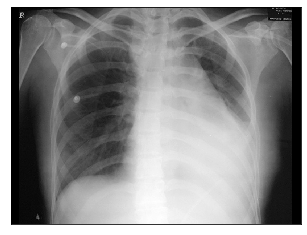

In [3]:
plt.imshow(torax, cmap = 'gray', interpolation = 'none'), plt.xticks([]), plt.yticks([]) ;

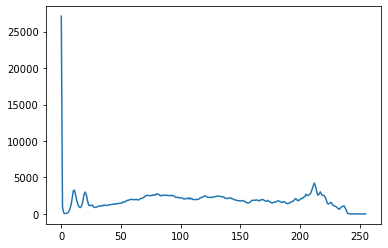

In [4]:
# Calcular el histograma 
hist = cv.calcHist ([torax], [0], None , [256], [0,256])
plt.plot(hist)

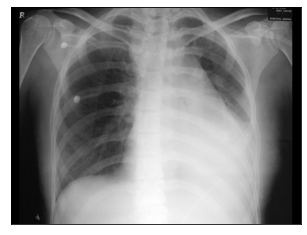

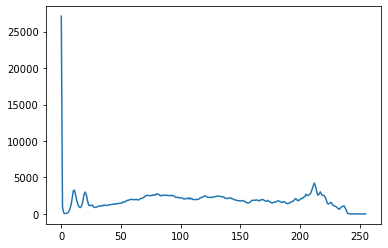

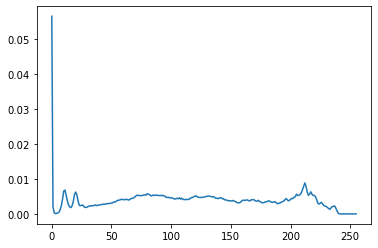

In [6]:
# se normaliza el histograma para obtener valores en [0,1]
histo_norm = hist/(torax.size)
plt.figure(1)
plt.imshow(torax,'gray')
plt.xticks([]), plt.yticks([]) 

histo_norm = hist/(torax.size)
plt.figure(2)
plt.plot(hist)
plt.show()
plt.plot(histo_norm) 
plt.show()

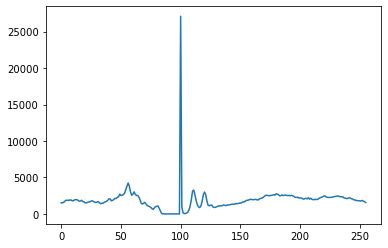

In [93]:
torax_img2 = desplazarHist1(torax,100);

hist2 = np.bincount (torax_img2.ravel (), minlength = 256)
plt.plot(hist2);

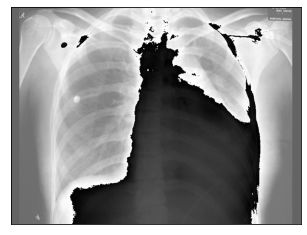

In [94]:
plt.imshow(torax_img2, cmap='gray')
plt.xticks([]), plt.yticks([]);

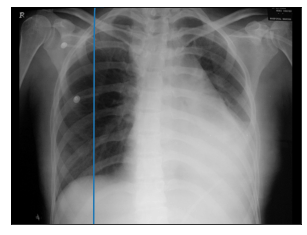

In [95]:
torax_img3 = desplazarHist2(torax,-10)
hist3 = np.bincount (torax_img3.ravel (), minlength = 256)
plt.plot(hist3)

plt.imshow(torax_img3, cmap='gray', vmin=0,vmax=255)
plt.xticks([]), plt.yticks([]) ;

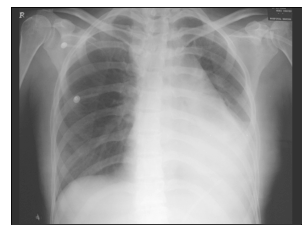

In [96]:
### contraer histograma
min = 50
max = 250
torax_img4 = contraerHist(torax,min, max)

plt.imshow(torax_img4,cmap='gray', vmin=0,vmax=255)
plt.xticks([]), plt.yticks([]);

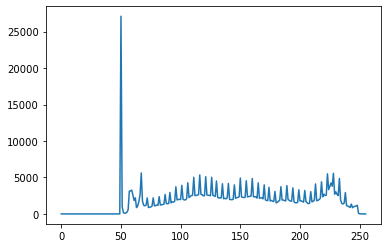

In [97]:
hist4 = np.bincount (torax_img4.ravel (), minlength = 256)
plt.plot(hist4);

## Mejoramiento del contraste en las imagenes de prueba

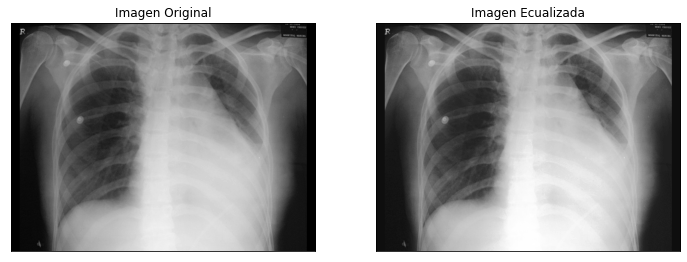

In [98]:
#Se ecualiza la imagen
torax_img5 = equalizaUniforme(torax)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(torax, cmap='gray', vmin = 0, vmax=255),plt.title('Imagen Original')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(torax_img5, cmap='gray',vmin = 0, vmax=255),plt.title('Imagen Ecualizada')
plt.xticks([]), plt.yticks([]);

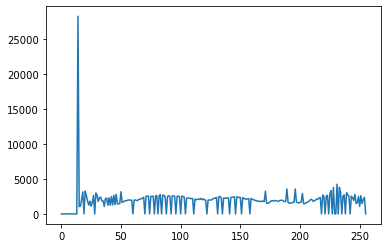

In [99]:
#Histograma de la imagen ecualizada
hist_torax = np.bincount (torax_img5.ravel (), minlength = 256)
plt.plot(hist_torax)

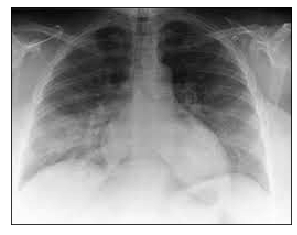

In [100]:
torax2 = cv.imread('torax2.jpg',0);
plt.imshow(torax2, cmap = 'gray', interpolation = 'none'), plt.xticks([]), plt.yticks([]) ;

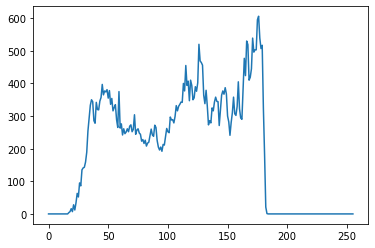

In [101]:
hist_torax2 = np.bincount (torax2.ravel (), minlength = 256)
plt.plot(hist_torax2);

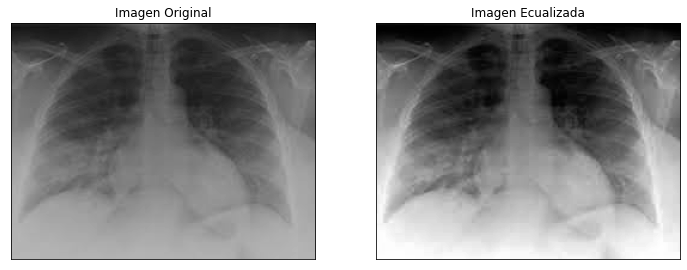

In [102]:
torax2_img = equalizaUniforme(torax2)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(torax2, cmap='gray', vmin = 0, vmax=255),plt.title('Imagen Original')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(torax2_img, cmap='gray',vmin = 0, vmax=255),plt.title('Imagen Ecualizada')
plt.xticks([]), plt.yticks([]);

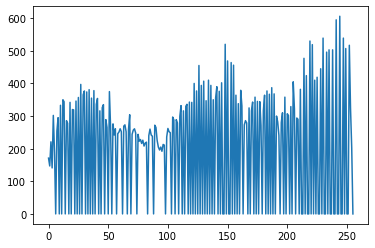

In [103]:
#Histograma de la imagen ecualizada
hist_t2eq = np.bincount (torax2_img.ravel (), minlength = 256)
plt.plot(hist_t2eq);

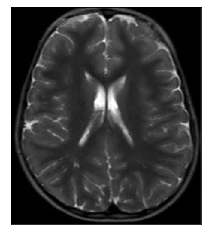

In [104]:
brain= cv.imread('brain1.jpg',0);

plt.imshow(brain, cmap = 'gray', interpolation = 'none'), plt.xticks([]), plt.yticks([]) ;

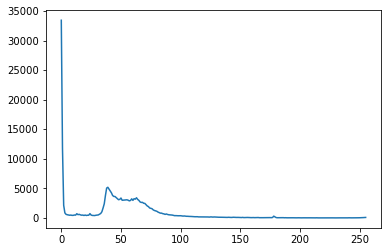

In [105]:
hist_brain = np.bincount(brain.ravel (), minlength = 256)
plt.plot(hist_brain);

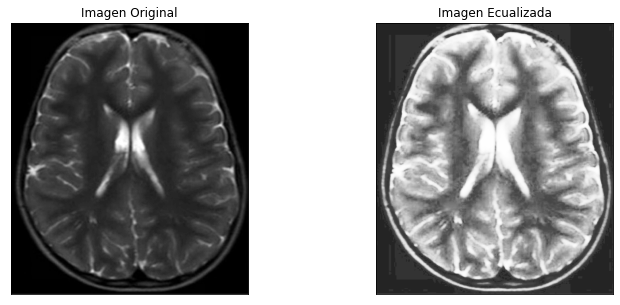

In [106]:
brain_img = equalizaUniforme(brain)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(brain, cmap='gray', vmin = 0, vmax=255),plt.title('Imagen Original')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(brain_img, cmap='gray',vmin = 0, vmax=255),plt.title('Imagen Ecualizada')
plt.xticks([]), plt.yticks([]);

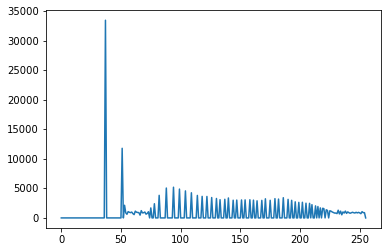

In [107]:
#Histograma de la imagen ecualizada
hist_beq = np.bincount (brain_img.ravel (), minlength = 256)
plt.plot(hist_beq);

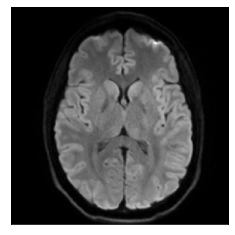

In [108]:
brain2= cv.imread('brain2.jpg',0);
plt.imshow(brain2, cmap = 'gray', interpolation = 'none'), plt.xticks([]), plt.yticks([]) ;

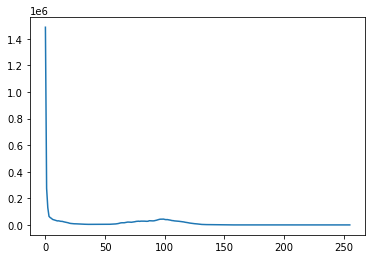

In [109]:
hist_brain2 = np.bincount(brain2.ravel (), minlength = 256)
plt.plot(hist_brain2);

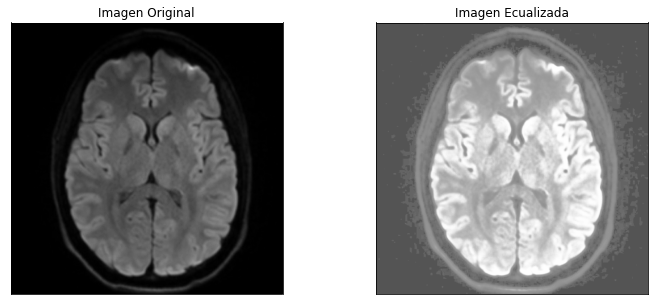

In [110]:
brain2_img = equalizaUniforme(brain2)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(brain2, cmap='gray', vmin = 0, vmax=255),plt.title('Imagen Original')
plt.xticks([]), plt.yticks([]);

plt.subplot(122)
plt.imshow(brain2_img, cmap='gray',vmin = 0, vmax=255),plt.title('Imagen Ecualizada')
plt.xticks([]), plt.yticks([]);

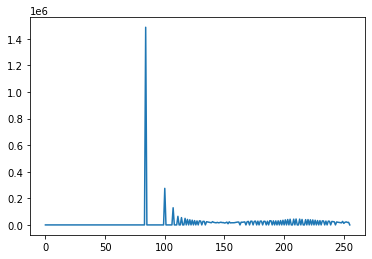

In [84]:
#Histograma de la imagen ecualizada
hist_b2eq = np.bincount (brain2_img.ravel (), minlength = 256)
plt.plot(hist_b2eq);